<a href="https://colab.research.google.com/github/joaoclaudio82/CNNclassification-/blob/main/An%C3%A1liseSeattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iremos iniciar nosso trabalho realizando uma análise exploratória de dados

## Passo 1: Vamos iniciar o trabalho, importando as bibliotecas necessárias

In [331]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn import over_sampling
from imblearn import under_sampling
from sklearn.linear_model import LogisticRegression

In [332]:
dados = pd.read_csv('Use_Of_Force.csv')

## Passo 2: Vamos verificar o tamanho, o cabeçalho e realizar uma análise exploratória de nosso dataset

In [333]:
dados.shape

(14264, 11)

Temos 14264 linhas e 11 colunas em nosso dataset



In [334]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14264 entries, 0 to 14263
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 14264 non-null  object
 1   Incident_Num       14264 non-null  int64 
 2   Incident_Type      14264 non-null  object
 3   Occured_date_time  14264 non-null  object
 4   Precinct           14264 non-null  object
 5   Sector             13313 non-null  object
 6   Beat               14264 non-null  object
 7   Officer_ID         14264 non-null  int64 
 8   Subject_ID         14264 non-null  int64 
 9   Subject_Race       14264 non-null  object
 10  Subject_Gender     14264 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.2+ MB


In [335]:
dados.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2014UOF-0001-1377-203,251,Level 1 - Use of Force,06/07/2014 12:09:00 AM,East,CHARLIE,C2,1594,203,Black or African American,Male
1,2014UOF-0002-1098-166,218,Level 1 - Use of Force,05/30/2014 02:06:00 PM,East,GEORGE,G1,1673,166,White,Male
2,2014UOF-0003-1031-125,178,Level 1 - Use of Force,05/23/2014 05:24:00 PM,West,KING,K3,1690,125,Asian,Female
3,2014UOF-0004-767-126,179,Level 1 - Use of Force,05/26/2014 12:10:00 AM,East,EDWARD,E2,953,126,Black or African American,Male
4,2014UOF-0005-1473-172,223,Level 1 - Use of Force,06/01/2014 04:03:00 PM,South,ROBERT,R1,1145,172,Black or African American,Male


Podemos converter aqui a coluna Occured_date_time para o formato de "datetime"

In [336]:
dados['Occured_date_time'] = pd.to_datetime(dados['Occured_date_time'])

In [337]:
dados['Incident_Type'].value_counts()

Level 1 - Use of Force    10173
Level 2 - Use of Force     3856
Level 3 - Use of Force      128
Level 3 - OIS               107
Name: Incident_Type, dtype: int64

Já percebemos aqui que temos 4 níveis de força empregada pela Polícia da cidade de Seattle


## Passo 3: Vamos agora fazer uma análise dos dados faltantes em nosso dataset

In [338]:
for var in dados:
    print(var)
    print('Nesta coluna existem', sum(dados[var].isna()),  'valores faltantes.', '\n')

ID
Nesta coluna existem 0 valores faltantes. 

Incident_Num
Nesta coluna existem 0 valores faltantes. 

Incident_Type
Nesta coluna existem 0 valores faltantes. 

Occured_date_time
Nesta coluna existem 0 valores faltantes. 

Precinct
Nesta coluna existem 0 valores faltantes. 

Sector
Nesta coluna existem 951 valores faltantes. 

Beat
Nesta coluna existem 0 valores faltantes. 

Officer_ID
Nesta coluna existem 0 valores faltantes. 

Subject_ID
Nesta coluna existem 0 valores faltantes. 

Subject_Race
Nesta coluna existem 0 valores faltantes. 

Subject_Gender
Nesta coluna existem 0 valores faltantes. 



## Passo 4: Verificação de dados duplicados

In [339]:
dados[dados.duplicated()]

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender


## Passo 5: Verificação de variáveis com valores constantes



In [340]:
for var in dados:
    print(var)
    print('Nesta coluna existem', len(dados[var].unique()),  'valores únicos.', '\n')
    print('Valores únicos:', dados[var].unique(), '\n')

ID
Nesta coluna existem 14264 valores únicos. 

Valores únicos: ['2014UOF-0001-1377-203' '2014UOF-0002-1098-166' '2014UOF-0003-1031-125'
 ... '2022UOF-0387-2614-15793' '2022UOF-0388-2670-15793'
 '2022UOF-0389-2739-8294'] 

Incident_Num
Nesta coluna existem 13488 valores únicos. 

Valores únicos: [  251   218   178 ... 68032 68029 67659] 

Incident_Type
Nesta coluna existem 4 valores únicos. 

Valores únicos: ['Level 1 - Use of Force' 'Level 2 - Use of Force'
 'Level 3 - Use of Force' 'Level 3 - OIS'] 

Occured_date_time
Nesta coluna existem 10699 valores únicos. 

Valores únicos: ['2014-06-07T00:09:00.000000000' '2014-05-30T14:06:00.000000000'
 '2014-05-23T17:24:00.000000000' ... '2022-05-24T20:51:00.000000000'
 '2022-05-24T20:52:00.000000000' '2022-04-19T21:02:00.000000000'] 

Precinct
Nesta coluna existem 9 valores únicos. 

Valores únicos: ['East' 'West' 'South' 'North' 'Southwest' 'X' '-' '0' 'OOJ'] 

Sector
Nesta coluna existem 18 valores únicos. 

Valores únicos: ['CHARLIE' 'GEOR

## Passo 6: Verificação de dados incorretos

A partir da análise acima, foram identificados alguns dados incorretos/inconsistentes:

- Na coluna 'Precinct': 'X' '-' '0' 'OOJ'
- Na coluna 'Sector': nan
- Na coluna 'Beat': '-' '0'
- Na coluna 'Subject_Gender': '-' 'm'

Inicialmente, é importante verificar se há alguma correlação entre os valores faltantes da variável "Sector" e as outras variáveis com valores incorretos.

In [341]:
dados_faltantes = dados.loc[dados['Sector'].isna()]

In [342]:
dados_faltantes.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
50,2014UOF-0053-627-522,553,Level 1 - Use of Force,2014-07-19 16:44:00,X,NaN,XX,913,520,Black or African American,Male
76,2014UOF-0076-375-389,439,Level 1 - Use of Force,2014-07-09 06:02:00,X,NaN,XX,302,388,White,Female
79,2014UOF-0080-1010-336,376,Level 1 - Use of Force,2014-07-01 06:00:00,X,NaN,XX,1220,335,White,Male
82,2014UOF-0083-1119-435,480,Level 1 - Use of Force,2014-07-12 11:20:00,X,NaN,XX,1800,434,Not Specified,Male
153,2014UOF-0154-1528-596,620,Level 1 - Use of Force,2014-07-23 22:12:00,X,NaN,XX,1180,594,Black or African American,Female


In [343]:
for var in dados_faltantes[['Precinct', 'Beat', 'Subject_Gender']]:
    print(var)
    print('Nesta coluna existem', len(dados_faltantes[var].unique()),  'valores únicos.', '\n')
    print('Valores únicos:', dados_faltantes[var].unique(), '\n')

Precinct
Nesta coluna existem 4 valores únicos. 

Valores únicos: ['X' '-' '0' 'OOJ'] 

Beat
Nesta coluna existem 4 valores únicos. 

Valores únicos: ['XX' '99' '-' '0'] 

Subject_Gender
Nesta coluna existem 6 valores únicos. 

Valores únicos: ['Male' 'Female' 'Unknown' '-' 'Other' 'm'] 



## Passo 7: vamos verificar se há alguma relação com a data de registro das ocorrências.

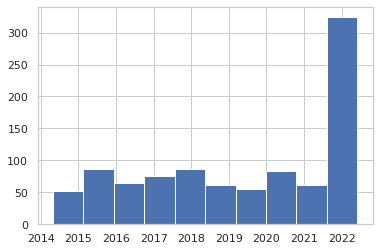

In [344]:
dados_faltantes['Occured_date_time'].hist();

A distribuição dos dados indica que a maior parte dos valores faltantes corresponde a registros feitos no ano de 2022.
Pode ser que haja alguma correlação com o policial responsável pela ocorrência, ou com o gênero da pessoa envolvida nela. Vamos verificar por meio da distribuição de frequência de valores únicos destas variáveis.

In [345]:
dados_faltantes['Officer_ID'].value_counts()

1615    28
704     25
1554    17
1231    15
1135    14
        ..
4744     1
443      1
701      1
2165     1
4996     1
Name: Officer_ID, Length: 404, dtype: int64

In [346]:
sum(dados_faltantes['Officer_ID'].value_counts() > 10)

11

11 policiais registraram mais de 10 ocorrências com valores faltantes. Vamos verificar se há alguma correlação com a data da ocorrência. Faremos essa verificação para os 10 policiais que mais possuem registros com dados faltantes.

In [347]:
ids = dados_faltantes['Officer_ID'].value_counts().index[0:10]

In [348]:
dados[dados['Officer_ID'].isin(ids)]

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
62,2014UOF-0063-1306-457,501,Level 1 - Use of Force,2014-07-15 16:15:00,North,NORA,N2,1615,456,Not Specified,Female
181,2014UOF-0179-44-771,755,Level 1 - Use of Force,2014-08-06 01:42:00,East,GEORGE,G3,1554,769,Black or African American,Male
184,2014UOF-0182-825-877,842,Level 2 - Use of Force,2014-08-13 23:50:00,South,SAM,S1,704,875,White,Male
186,2014UOF-0184-1416-877,844,Level 2 - Use of Force,2014-08-13 19:30:00,South,SAM,S1,1120,875,White,Male
213,2014UOF-0211-825-1043,1028,Level 1 - Use of Force,2014-09-04 21:00:00,North,UNION,U2,704,1040,White,Male
...,...,...,...,...,...,...,...,...,...,...,...
14247,2022UOF-0370-1169-27117,66673,Level 1 - Use of Force,2022-01-26 15:20:00,-,NaN,-,1231,27994,Not Specified,Unknown
14249,2022UOF-0372-1434-26633,66696,Level 1 - Use of Force,2022-01-26 15:09:00,-,NaN,-,1134,27510,Black or African American,Male
14251,2022UOF-0374-825-26633,66675,Level 2 - Use of Force,2022-01-26 15:20:00,-,NaN,-,704,27510,Black or African American,Male
14252,2022UOF-0374-825-27117,66675,Level 2 - Use of Force,2022-01-26 15:20:00,-,NaN,-,704,27994,Not Specified,Unknown


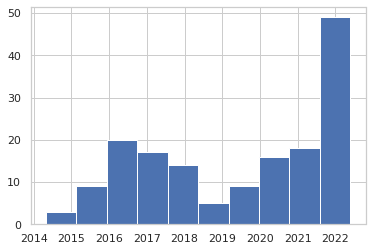

In [349]:
dados_faltantes[dados_faltantes['Officer_ID'].isin(ids)]['Occured_date_time'].hist();

De fato, a maior parte dos dados faltantes foi registrada em 2022.
Por fim, vamos verificar se há algum padrão no gênero das pessoas associadas às ocorrências com dados faltantes. Para isso, vamos normalizar a frequência das classes de gênero nas observações faltantes pela quantidade de pessoas nestas classes na base original.

In [350]:
dados_faltantes['Subject_Gender'].value_counts()/dados['Subject_Gender'].value_counts()

-                     0.045455
Female                0.054251
Male                  0.070088
Non-binary                 NaN
Other                 0.160000
Transgender Female         NaN
Transgender Male           NaN
Unknown               0.066810
m                     1.000000
Name: Subject_Gender, dtype: float64

Aparentemente, não há correlação entre o gênero e os dados faltantes. Podemos supor que a origem dos dados faltantes é aleatória e que podemos excluir estas observações sem grande prejuízo para a análise. Para uma análise mais precisa, seria necessário conversar com especialista da área ou com a equipe que gerencia a base de dados fornecida.

In [351]:
dados = dados.dropna()

## Passo 8: Vamos verificar se ainda existem dados incorretos nas colunas 'Precinct', 'Beat' e 'Subject_Gender'.

In [352]:
for var in dados[['Precinct', 'Beat', 'Subject_Gender']]:
    print(var)
    print('Nesta coluna existem', len(dados[var].unique()),  'valores únicos.', '\n')
    print('Valores únicos:', dados[var].unique(), '\n')

Precinct
Nesta coluna existem 5 valores únicos. 

Valores únicos: ['East' 'West' 'South' 'North' 'Southwest'] 

Beat
Nesta coluna existem 51 valores únicos. 

Valores únicos: ['C2' 'G1' 'K3' 'E2' 'R1' 'K1' 'G3' 'C1' 'S1' 'L1' 'U2' 'L2' 'D3' 'F2'
 'E1' 'D1' 'J3' 'C3' 'N2' 'R3' 'F1' 'N3' 'J1' 'U3' 'L3' 'B1' 'O3' 'S2'
 'S3' 'R2' 'Q2' 'K2' 'D2' 'W3' 'N1' 'B3' 'F3' 'M3' 'M2' 'G2' 'U1' 'B2'
 'Q1' 'M1' 'E3' 'Q3' 'O1' 'J2' 'W2' 'W1' 'O2'] 

Subject_Gender
Nesta coluna existem 8 valores únicos. 

Valores únicos: ['Male' 'Female' 'Unknown' '-' 'Other' 'Transgender Male'
 'Transgender Female' 'Non-binary'] 



Na coluna 'Subject_Gender', ainda existem observações com o valor '-'.
* O valor '-' não é informativo e não podemos deduzir o valor correto para substituí-lo. Portanto, este deve ser convertido em um dado faltante.

In [353]:
dados.loc[dados['Subject_Gender'] == '-', 'Subject_Gender'] = np.nan

# Questão 1: Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, meses, semanas ou dos anos?

#INCIDENTES POR DIA


In [80]:
#INCIDENTES POR DIA
#vamos criar aqui um dataset dados_dia, onde teremos uma coluna date que conterá o dia da ocorrência

dados_dia = dados.copy()

dados_dia['date'] = pd.to_datetime(dados_dia['Occured_date_time']).dt.to_period('D')

#vamos agrupar os dados por data e fazer uma contagem
dados_dia = dados_dia.groupby(['date']).count()

# Vamos pegar a coluna Incident_Num, que significa de forma mais contundente a quantidade agrupada pelo seu valor único
# Vamos renomear a coluna Incident_Num para Quantidade e  por fim ordenar os dados
dados_dia = dados_dia[['Incident_Num']]
dados_dia.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)


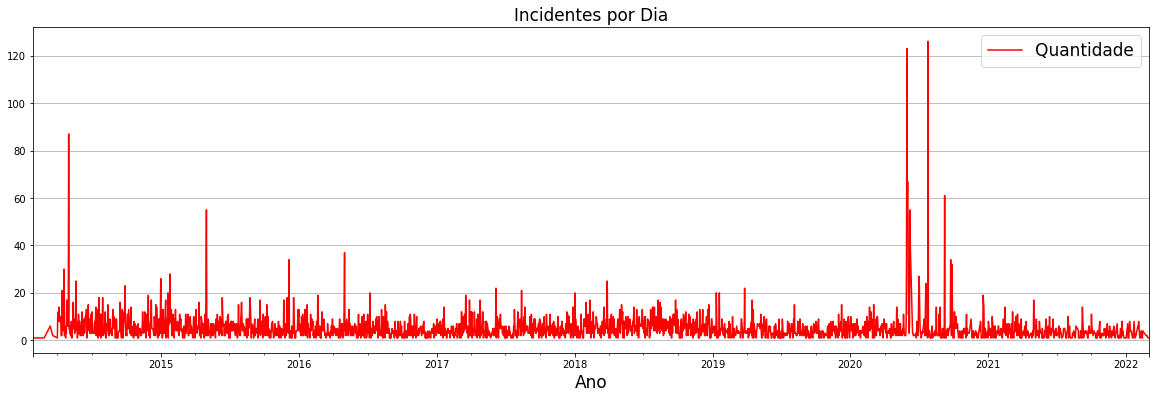

In [84]:
#Vamos plotar um gráfico aqui onde o eixo x será os "dias" e o eixo y a coluna Incident_Num

fig, ax = plt.subplots(figsize=(20, 6))
dados_dia.plot(ax=ax, kind='line', color="red")


plt.xlabel('Ano', fontsize=17)
plt.legend(['Quantidade'], fontsize=17)
plt.title('Incidentes por Dia', fontsize=17)
plt.grid(axis='y')


Analisando o gráfico acima  podemos perceber que os picos de quantidade de incidentes diminuem entre 2014 e 2019, ficando cada vez menos frequente. Porém entre 2020 e 2021 temos picos bem acentuados, particularmente próximos ao meio do ano. 


#INCIDENTES POR MÊS


In [83]:
##INCIDENTES POR Mês

# Vamos seguir o mesmo procedimento exceutado acima, porém agora vamos considerar o período MÊS (dt.to_period('M'))

dados_mes = dados.copy()

dados_mes['year_month'] = pd.to_datetime(dados_mes['Occured_date_time']).dt.to_period('M')
dados_mes = dados_mes.groupby(['year_month']).count()

# Vamos selecionar aqui novamente a coluna Incident_Num que é campo onde existe contagem, iremms renomear novamente

dados_mes = dados_mes[['Incident_Num']]
dados_mes.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

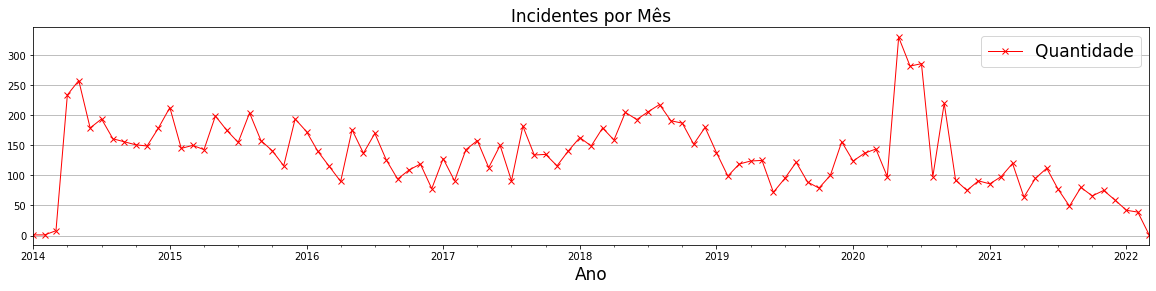

In [85]:
fig, ax = plt.subplots(figsize=(20, 4))
dados_mes.plot(ls="-", lw="1", marker="x", ax=ax, color="red")


plt.xlabel('Ano', fontsize=17)
plt.legend(['Quantidade'], fontsize=17)
plt.title('Incidentes por Mês', fontsize=17)
plt.grid(axis='y')


Podemos perceber  um crescimento no número de incidentes no final de todo ano até 2018. De meados de 2018 até 2019 tivemos uma queda, porém entre 2020 e 2021, temos uma elevação com picos acentuados. A tendência de meados de 2018 até 2022 é de queda.

#INCIDÊNCIA POR SEMANA

In [86]:
# INCIDÊNCIA POR SEMANA
# Vamos seguir o mesmo procedimento exceutado acima, porém agora vamos considerar o período MÊS (dt.to_period('W'))

dados_semana = dados.copy()
dados_semana['week'] = pd.to_datetime(dados_semana['Occured_date_time']).dt.to_period('W')
dados_semana = dados_semana.groupby(['week']).count()

# Vamos selecionar aqui novamente a coluna Incident_Num que é campo onde existe contagem, iremms renomear novamente

dados_semana = dados_semana[['Incident_Num']]
dados_semana.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

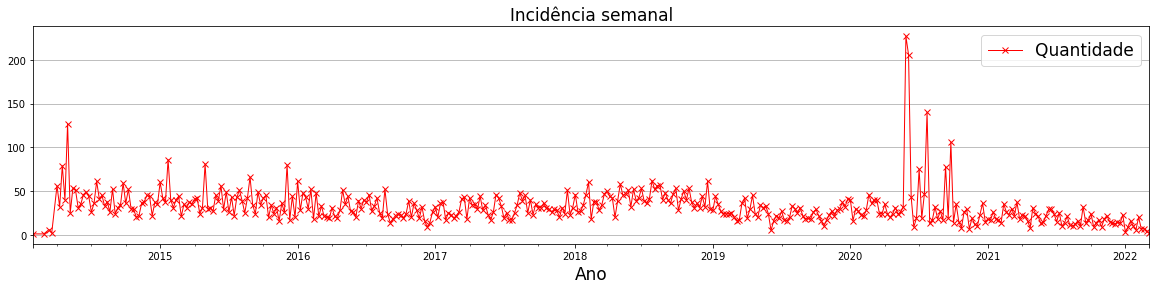

In [87]:
fig, ax = plt.subplots(figsize=(20, 4))
dados_semana.plot(ls="-", lw="1", marker="x", ax=ax, color="red")

plt.xlabel('Ano', fontsize=17)
plt.legend(['Quantidade'], fontsize=17)
plt.title('Incidência semanal', fontsize=17)
plt.grid(axis='y')


No  gráfico acima entre final de 2016 e meados de 2020 temos uma certa estabilidade no número de incidências, mantendo a quantidade de incidência por semana menor que 50. Temos novamente picos acentuaddos em meados do ano de 2020, isso até pode nos levar a crer que pode ser uma consequência da recente pandemia mundial.


# INCIDÊNCIA POR ANO

In [88]:
# INCIDÊNCIA POR ANO
# Vamos seguir o mesmo procedimento exceutado acima, porém agora vamos considerar o período MÊS (dt.to_period('Y'))

dados_ano = dados.copy()
dados_ano['week'] = pd.to_datetime(dados_ano['Occured_date_time']).dt.to_period('Y')
dados_ano = dados_ano.groupby(['week']).count()

# Vamos selecionar aqui novamente a coluna Incident_Num que é campo onde existe contagem, iremms renomear novamente

dados_ano = dados_ano[['Incident_Num']]
dados_ano.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

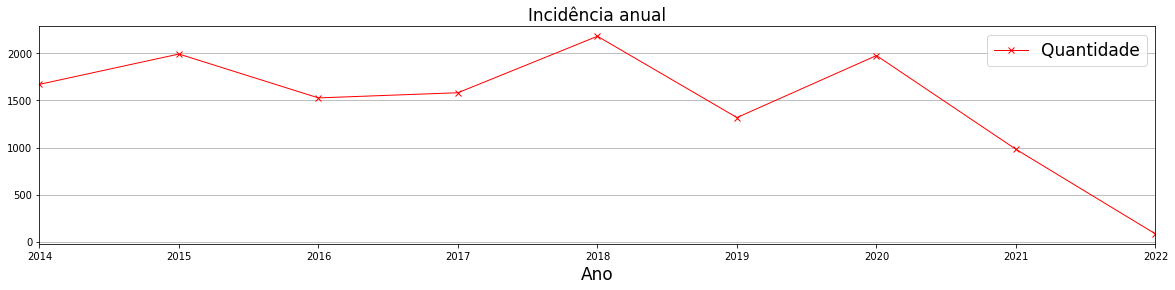

In [89]:
fig, ax = plt.subplots(figsize=(20, 4))
dados_ano.plot(ls="-", lw="1", marker="x", ax=ax, color="red")

plt.xlabel('Ano', fontsize=17)
plt.legend(['Quantidade'], fontsize=17)
plt.title('Incidência anual', fontsize=17)
plt.grid(axis='y')


Entre 2014 e 2020 a incidência anual se mantém entre 1500 e 2000 casos, porém de 2020 para início de 2022 a tendência  é claramente de queda.

# Questão 2: Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes “Level 2” calculado na questão. Que interpretação pode ser dada a este resultado?

##Passo 1: obter inicialmente um gráfico de reincidência  por setor

In [243]:
#Vamos fazer aqui um agrupamento dos nossos dados por Precinct', 'Sector', 'Subject_ID, e vamos aplicar a função count para contar os 
#dados das outras colunas
dados_agrupados = dados.groupby(['Precinct', 'Sector', 'Subject_ID']).count()


In [244]:
dados_agrupados

ID  Incident_Num  Incident_Type  \
Precinct Sector  Subject_ID                                    
East     CHARLIE 121          1             1              1   
                 169          1             1              1   
                 170          1             1              1   
                 171          1             1              1   
                 203          1             1              1   
...                          ..           ...            ...   
West     QUEEN   27521        2             2              2   
                 27555        2             2              2   
                 27811        1             1              1   
                 27920        1             1              1   
                 28041        4             4              4   

                             Occured_date_time  Beat  Officer_ID  \
Precinct Sector  Subject_ID                                        
East     CHARLIE 121                         1     1           1   
                 169                         1     1           1   
                 170                         1     1           1   
                 171                         1     1           1   
                 203                         1     1           1   
...                                        ...   ...         ...   
West     QUEEN   27521                       2     2           2   
                 27555                       2     2           2   
                 27811                       1     1           1   
                 27920                       1     1           1   
                 28041                       4     4           4   

                             Subject_Race  Subject_Gender  
Precinct Sector  Subject_ID                                
East     CHARLIE 121                    1               0  
                 169                    1               1  
                 170                    1               1  
                 171                    1               1  
                 203                    1               1  
...                                   ...             ...  
West     QUEEN   27521                  2               2  
                 27555                  2               2  
                 27811                  1               1  
                 27920                  1               1  
                 28041                  4               4  

[7959 rows x 8 columns]

In [245]:
#agora vamos selecionar aqui a coluna 'Incident_Num'
dados_agrupados = dados_agrupados[['Incident_Num']]
dados_agrupados 

Incident_Num
Precinct Sector  Subject_ID              
East     CHARLIE 121                    1
                 169                    1
                 170                    1
                 171                    1
                 203                    1
...                                   ...
West     QUEEN   27521                  2
                 27555                  2
                 27811                  1
                 27920                  1
                 28041                  4

[7959 rows x 1 columns]

In [246]:
# Quando houver reincidência, ou seja, quando o incidente ocorrer mais de uma vez,  vamos acrescentar um campo 
# denominado 'Reincidencia', ele será basicamente
#uma coluna de verdadeiro(se houver reincidência ) ou falso(caso não tenhamos reincidência).

dados_agrupados.loc[dados_agrupados['Incident_Num'] >= 2, 'Reincidencia'] = True
dados_agrupados.loc[dados_agrupados['Incident_Num'] == 1, 'Reincidencia'] = False

#vamos ver como ficou nosso dataframe
dados_agrupados_count = dados_agrupados.groupby(['Precinct', 'Sector', 'Reincidencia']).count()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Vamos ver como está nosso dataframe Reincidencia dados_agrupados_count

In [247]:
dados_agrupados_count

Incident_Num
Precinct  Sector  Reincidencia              
East      CHARLIE False                  199
                  True                    90
          EDWARD  False                  617
                  True                   312
          GEORGE  False                  241
                  True                   153
North     BOY     False                  190
                  True                   123
          JOHN    False                  183
                  True                    96
          LINCOLN False                  239
                  True                   146
          NORA    False                  389
                  True                   181
          UNION   False                  211
                  True                   142
South     OCEAN   False                  242
                  True                   115
          ROBERT  False                  416
                  True                   161
          SAM     False                  425
                  True                   182
          UNION   False                    1
Southwest FRANK   False                  191
                  True                    92
          WILLIAM False                  125
                  True                    80
West      DAVID   False                  400
                  True                   214
          KING    False                  587
                  True                   299
          MARY    False                  404
                  True                   209
          QUEEN   False                  199
                  True                   105

Aqui temos um agrupamento por Precint , Sector e para cada um deles temos a quantidade de reincidentes(TRUE) e não reicidentes(FALSE)

In [248]:
# Vamos agora calculcar agora a porcentagem de reicidentes e não reicidentes para cada 
#Sector pertecente a cada Precinct

dados_agrupados_count = dados_agrupados_count.groupby(level=1).apply(lambda x: x * 100/ x.sum())
dados_agrupados_count

Incident_Num
Precinct  Sector  Reincidencia              
East      CHARLIE False            68.858131
                  True             31.141869
          EDWARD  False            66.415501
                  True             33.584499
          GEORGE  False            61.167513
                  True             38.832487
North     BOY     False            60.702875
                  True             39.297125
          JOHN    False            65.591398
                  True             34.408602
          LINCOLN False            62.077922
                  True             37.922078
          NORA    False            68.245614
                  True             31.754386
          UNION   False            59.604520
                  True             40.112994
South     OCEAN   False            67.787115
                  True             32.212885
          ROBERT  False            72.097054
                  True             27.902946
          SAM     False            70.016474
                  True             29.983526
          UNION   False             0.282486
Southwest FRANK   False            67.491166
                  True             32.508834
          WILLIAM False            60.975610
                  True             39.024390
West      DAVID   False            65.146580
                  True             34.853420
          KING    False            66.252822
                  True             33.747178
          MARY    False            65.905383
                  True             34.094617
          QUEEN   False            65.460526
                  True             34.539474

In [249]:
#Vamos agora redefinir os índices do nosso dataframe
dados_agrupados_count.reset_index(inplace=True)

In [250]:
#vamos dar uma olhada no dataframe dados_agrupados_count
dados_agrupados_count

,Precinct,Sector,Reincidencia,Incident_Num
0,East,CHARLIE,False,68.858131
1,East,CHARLIE,True,31.141869
2,East,EDWARD,False,66.415501
3,East,EDWARD,True,33.584499
4,East,GEORGE,False,61.167513
5,East,GEORGE,True,38.832487
6,North,BOY,False,60.702875
7,North,BOY,True,39.297125
8,North,JOHN,False,65.591398
9,North,JOHN,True,34.408602


In [251]:
#agora vamos renomear a coluna Incident_Num' como 'Percentual', ou seja o percentual de reincidência 
#por sector e precinct

dados_agrupados_count.rename(columns={'Incident_Num': 'Percentual'}, inplace=True)
dados_agrupados_count.sort_values(by='Sector', ascending=False, inplace=True)

dados_agrupados_count

,Precinct,Sector,Reincidencia,Percentual
26,Southwest,WILLIAM,True,39.024390
25,Southwest,WILLIAM,False,60.975610
14,North,UNION,False,59.604520
22,South,UNION,False,0.282486
15,North,UNION,True,40.112994
21,South,SAM,True,29.983526
20,South,SAM,False,70.016474
19,South,ROBERT,True,27.902946
18,South,ROBERT,False,72.097054
34,West,QUEEN,True,34.539474


In [252]:
#vamos selecionar aqui apenas as reincidências(TRUE)
is_Reincidencia = dados_agrupados_count['Reincidencia'] == True
dados_agrupados_count = dados_agrupados_count[is_Reincidencia]
dados_agrupados_count.sort_values(by='Sector', ascending=False, inplace=True)
#antes como sempre vamos visualizar como está ficando o nosso dataframe
dados_agrupados_count

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Precinct,Sector,Reincidencia,Percentual
26,Southwest,WILLIAM,True,39.024390
15,North,UNION,True,40.112994
21,South,SAM,True,29.983526
19,South,ROBERT,True,27.902946
34,West,QUEEN,True,34.539474
17,South,OCEAN,True,32.212885
13,North,NORA,True,31.754386
32,West,MARY,True,34.094617
11,North,LINCOLN,True,37.922078
30,West,KING,True,33.747178


Text(0.5, 1.0, 'Quantidade de Reincidência por Setor ')

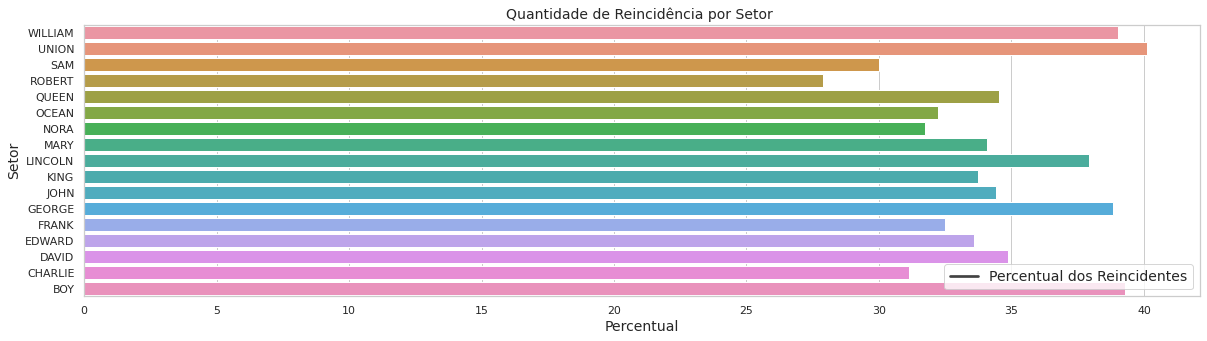

In [253]:
#vamos agora plotar o gráfico onde o eixo x vai se referir aos setores e o eixo y ao percentual de reincidência 

fig, ax = plt.subplots(figsize=(20, 5))
sns.set(style = 'whitegrid')  
sns.barplot(y=dados_agrupados_count['Sector'], x=dados_agrupados_count['Percentual'])


plt.legend(['Percentual dos Reincidentes'], fontsize=14)
plt.ylabel('Setor', fontsize=14)
plt.xlabel('Percentual', fontsize=14)
plt.title('Quantidade de Reincidência por Setor ', fontsize=14)


##Passo 2: Vamos fazer agora uma análise para ver o RANK por setor para tipo de incidência correspondente à Level 2 - Use of Force (que é o que a questão pede)

In [255]:
#vamos fazer um agrupamento para contar a quantidade de incidências(incident_type) para cada precinct e sector
dados_incidencia_setor = dados.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()
dados_incidencia_setor

Precinct  Sector   Incident_Type         
East      CHARLIE  Level 1 - Use of Force    315
                   Level 2 - Use of Force    105
                   Level 3 - OIS               1
                   Level 3 - Use of Force      4
          EDWARD   Level 1 - Use of Force    903
                                            ... 
West      MARY     Level 3 - Use of Force     15
          QUEEN    Level 1 - Use of Force    396
                   Level 2 - Use of Force    100
                   Level 3 - OIS               7
                   Level 3 - Use of Force      6
Name: Incident_Num, Length: 67, dtype: int64

In [256]:
#vamos criar um dataframe para armazenar o percentual (dados_incidencia_setor_percentual)
dados_incidencia_setor_percentual = dados_incidencia_setor.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()
dados_incidencia_setor_percentual

,Precinct,Sector,Incident_Type,Incident_Num
0,East,CHARLIE,Level 1 - Use of Force,74.117647
1,East,CHARLIE,Level 2 - Use of Force,24.705882
2,East,CHARLIE,Level 3 - OIS,0.235294
3,East,CHARLIE,Level 3 - Use of Force,0.941176
4,East,EDWARD,Level 1 - Use of Force,51.956272
...,...,...,...,...
62,West,MARY,Level 3 - Use of Force,1.503006
63,West,QUEEN,Level 1 - Use of Force,77.799607
64,West,QUEEN,Level 2 - Use of Force,19.646365
65,West,QUEEN,Level 3 - OIS,1.375246


In [257]:
level_2 = dados_incidencia_setor_percentual['Incident_Type'] == 'Level 2 - Use of Force'
dados_incidencia_setor_percentual = dados_incidencia_setor_percentual[level_2]
dados_incidencia_setor_percentual.rename(columns={'Incident_Num': 'Percentual'}, inplace=True)
dados_incidencia_setor_percentual.sort_values(by='Percentual', ascending=True, inplace=True)
#dados_incidencia_setor_percentual.set_index(['Precinct', 'Sector'], inplace=True)






/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Porcentagem de Incidentes level 2 por Setor')

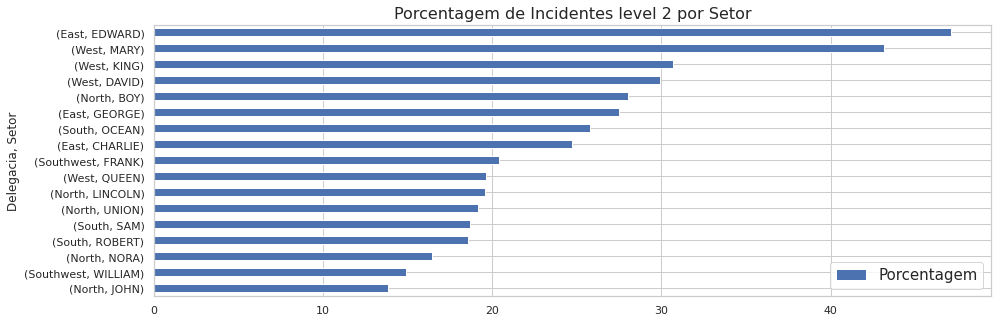

In [234]:

dados_incidencia_setor_percentual.plot(kind='barh', figsize=(15, 5))
plt.ylabel('Delegacia e Setor')
plt.legend(['Porcentagem'], fontsize=15)
plt.title('Porcentagem de Incidentes level 2 por Setor', fontsize=16)


In [263]:
dados_incidencia_setor_percentual.reset_index(inplace=True)
dados_incidencia_setor_percentual.sort_values(by='Sector', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


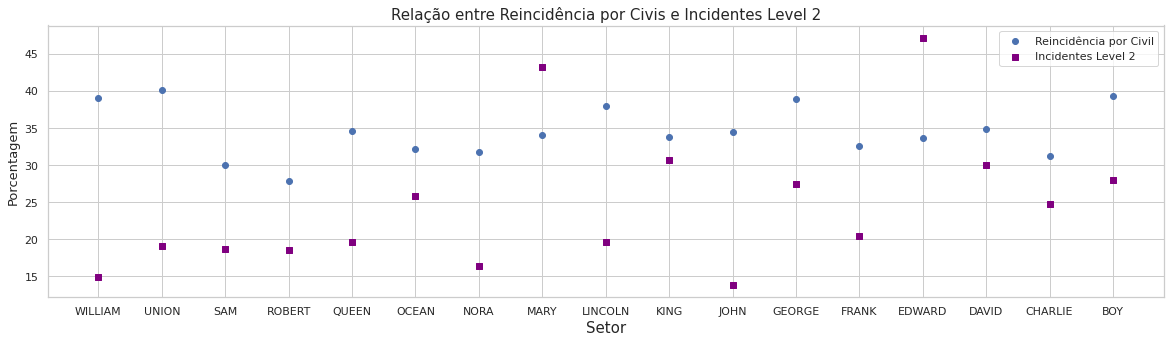

In [259]:
fig, ax = plt.subplots(figsize=(20, 5)) 

plt.scatter(x=dados_agrupados_count['Sector'], y=dados_agrupados_count['Percentual'])
plt.scatter(x=dados_incidencia_setor_percentual['Sector'], y=dados_incidencia_setor_percentual['Percentual'], color='purple', marker='s')


plt.ylabel('Porcentagem', fontsize=13)
plt.xlabel('Setor', fontsize=15)
plt.title('Relação entre Reincidência por Civis e Incidentes Level 2', fontsize=15)
plt.legend(['Reincidência por Civil', 'Incidentes Level 2'])

Como podemos perceber nos 3 últimos gráficos acima: não conseguimos achar uma correlação visual entre a reincidência por civis e incidentes level 2. A porcentagem de reicidentes por civis é de modeo geral maior que a porcentagem de incidentes level 2.


O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1. A correlação nos indica a interdependência entre duas ou mais variáveis. É uma informação importante, que pode ser aplicada em várias situações. Para isso vamos usar a função corr do pandas.


In [264]:
dados_agrupados_count['Percentual'].corr(dados_incidencia_setor_percentual['Percentual'])

0.3955287165548508

Em nosso resultado obtivemos uma correlação positiva que ocorre quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta, porém o valor aqui obtido está entre 0.3 e 0.5 o que caracteriza uma correlação  fraca.


#Questão 3: Considerando que é interessante para a Polícia de Seattle predizer o possível nível do uso da forca policial empregado em uma ocorrência, crie um modelo de classificação utilizando técnicas clássicas de Aprendizagem de Máquina (por exemplo: Regressão logística, Árvores de Decisão, Máquina de Vetores de Suporte (SVM)). Utilize diferentes métricas para avaliar o seu modelo. Qual acurácia seu modelo obteve e a que se deve isto?

As variáveis 'ID' e 'Incident_Num' não são informativas para o modelo de classificação, pois possuem valores únicos para cada observação. A variável 'Officer_ID' não possui apenas valores únicos, mas apresenta informações irrelevantes para um modelo generalizado de classificação. Portanto, estas serão removidas da base de dados. A variável 'Subject_ID' também será removida, mas em seu lugar, pode ser relevante considerar se a ocorrência é uma reincidência ou não. 

In [354]:
dados = dados.drop(['ID', 'Incident_Num', 'Officer_ID', 'Subject_ID', 'Beat'], axis=1)

In [355]:
dados['Month'] = pd.DatetimeIndex(dados['Occured_date_time']).month

In [356]:
dados = dados.drop(['Occured_date_time'], axis=1)

In [357]:
dados.head()

,Incident_Type,Precinct,Sector,Subject_Race,Subject_Gender,Month
0,Level 1 - Use of Force,East,CHARLIE,Black or African American,Male,6
1,Level 1 - Use of Force,East,GEORGE,White,Male,5
2,Level 1 - Use of Force,West,KING,Asian,Female,5
3,Level 1 - Use of Force,East,EDWARD,Black or African American,Male,5
4,Level 1 - Use of Force,South,ROBERT,Black or African American,Male,6


Com exceção da variável que indica o mês da ocorrência, todas as outras são categóricas. Neste caso, é importante codificá-las. Para isso, a estratégia mais apropriada é o One-hot-encoding.

In [358]:
dados_encoded = dados.copy()

In [359]:
dados.head()

,Incident_Type,Precinct,Sector,Subject_Race,Subject_Gender,Month
0,Level 1 - Use of Force,East,CHARLIE,Black or African American,Male,6
1,Level 1 - Use of Force,East,GEORGE,White,Male,5
2,Level 1 - Use of Force,West,KING,Asian,Female,5
3,Level 1 - Use of Force,East,EDWARD,Black or African American,Male,5
4,Level 1 - Use of Force,South,ROBERT,Black or African American,Male,6


In [360]:
dummy_vars = pd.get_dummies(dados['Precinct'])
dados_encoded = pd.concat([dados_encoded, dummy_vars], axis=1, sort=False)
dados_encoded = dados_encoded.drop(['Precinct'], axis=1)

In [361]:
dummy_vars = pd.get_dummies(dados['Sector'])
dados_encoded = pd.concat([dados_encoded, dummy_vars], axis=1, sort=False)
dados_encoded = dados_encoded.drop(['Sector'], axis=1)

In [362]:
dummy_vars = pd.get_dummies(dados['Subject_Race'])
dados_encoded = pd.concat([dados_encoded, dummy_vars], axis=1, sort=False)
dados_encoded = dados_encoded.drop(['Subject_Race'], axis=1)

In [363]:
dummy_vars = pd.get_dummies(dados['Subject_Gender'])
dados_encoded = pd.concat([dados_encoded, dummy_vars], axis=1, sort=False)
dados_encoded = dados_encoded.drop(['Subject_Gender'], axis=1)

In [364]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(dados['Incident_Type'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [365]:
nrow, ncol = dados.shape
y = dados_encoded['Incident_Type']#enc.transform(dados_encoded['Incident_Type'].values.reshape(-1,1)).toarray()
X = dados_encoded.loc[:, dados_encoded.columns != 'Incident_Type']

In [366]:
X

,Month,East,North,South,Southwest,West,BOY,CHARLIE,DAVID,EDWARD,...,Not Specified,Two or More Races,White,Female,Male,Non-binary,Other,Transgender Female,Transgender Male,Unknown
0,6,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,5,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13996,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
13998,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
14004,3,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Antes de implementar o modelo de classificação, vamos observar a distribuição das observações entre os 4 níveis de uso da força policial.

In [367]:
tab = pd.crosstab(index = dados['Incident_Type'], columns='count')
tab

col_0,count
Incident_Type,
Level 1 - Use of Force,9434
Level 2 - Use of Force,3665
Level 3 - OIS,93
Level 3 - Use of Force,121


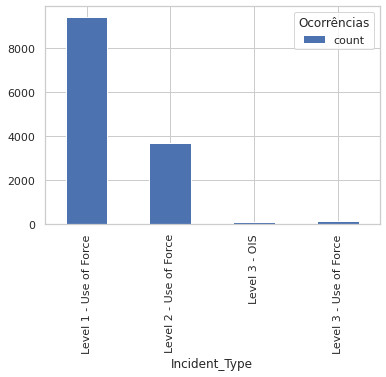

In [368]:
tab.plot.bar()
plt.legend(title = 'Ocorrências')
plt.show()

A partir do gráfico acima, fica claro que a base de dados está desbalanceada, o que pode interferir no ajuste do modelo de classificação.

In [369]:
#Separação da base de dados em treino (80%) e teste (20%)
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

# Vamos agora iniciar a utilização de técnicas clássicas de Aprendizagem de Máquina (no caso aqui vamos: Regressão logística e SVM

In [370]:
#Regressão logística

In [371]:
log_model = LogisticRegression(solver = 'lbfgs', 
                           multi_class = 'auto', max_iter = 1000)
log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)

In [372]:
print('Acurácia - Regressão Logística: ', metrics.accuracy_score(y_test, y_pred_log))
print('Acurácia balanceada - Regressão Logística: ', metrics.balanced_accuracy_score(y_test, y_pred_log))

Acurácia - Regressão Logística:  0.7146075854299662
Acurácia balanceada - Regressão Logística:  0.2838045250017081


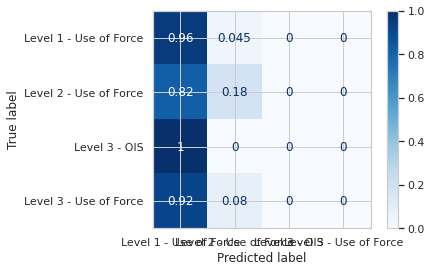

In [373]:
disp = ConfusionMatrixDisplay.from_estimator(log_model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

A acurácia usando regressão logística está calculada acima.

In [374]:
#SVM

In [375]:
svc_model = SVC(gamma='auto')
svc_model.fit(x_train, y_train)

y_pred_svc = svc_model.predict(x_test)

In [376]:
print('Acurácia - SVM: ', metrics.accuracy_score(y_test, y_pred_svc))
print('Acurácia balanceada - SVM: ', metrics.balanced_accuracy_score(y_test, y_pred_svc))

Acurácia - SVM:  0.7157341344348479
Acurácia balanceada - SVM:  0.2741494009099643


A acurácia usando SVM está calculada acima. 

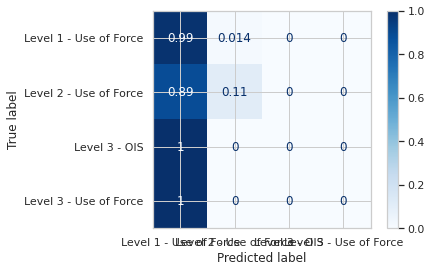

In [377]:
disp = ConfusionMatrixDisplay.from_estimator(svc_model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Em modelos de machine learning preditivos, o grande objetivo é prever uma resposta futura com base nos preditores passados (campos da sua base de dados que se relacionem com seu alvo resposta).

Em uma linguagem simples, podemos dizer que um modelo de machine learning com alto viés “aprendeu pouco” e um modelo com muita variância “aprendeu demais”.

Encontrar o equilíbrio entre o Viés e Variância é um processo iterativo, treinando o modelo várias vezes com diferentes combinações de features, hiperparâmetros e com diferentes conjuntos de dados para treinamento.

Reduzir o Viés e a Variância é vital para um modelo robusto e de alto desempenho preditivo.

Analisando o resultado usando-se estes dois algoritmos podemos perceber claramente que a acurácia usando o SVM e regressão logística são acima de 0.72. Porém vale salientar que os dados estão desbalanceados, de tal modo que o algoritmo tende a sempre prever o nível de força policial como Level 1, já que grande parte das ocorrências estão nesse nível. Em outras palavras, podemos logo imaginar que praticamente acertou todas as classes e o modelo está ótimo. Contudo, a maior parte dos acertos vieram da classe majoritária, enviesando o resultado. Entretanto quando utilizamos a acurácia balanceada, no qual é levada em conta os acertos de cada classe de forma igualitária, o valor encontrado é de 0,27. Isto mostra uma valor mais próximo do quanto o modelo consegue acertar cada classe. Em nosso caso para termos uma acurácia melhor, será necessário utilizarmos outras técnicas de balanceamento ou mesmo, acrescentar mais informações ao nosso banco de dados.



# Questão 4: Suponha que o modelo elaborado para o item 3 não possuiu acurácia razoável para os propósitos da consultoria. Visando aumentá-la, utilize uma ou mais das seguintes técnicas de Aprendizado de Máquina em uma nova versão do modelo:

#a) Aprendizagem Profunda 
#b) Aumento Artificial de Dados (Data Augmentation)
#c) Técnicas de Balanceamento de Dados (ex. SMOTE, under-sampling)

#Foi possível melhorar a acurácia do modelo? A que se deve esse fato?

vamos aqui usar Técnicas de balanceamento de dados, no caso o Oversampling e Undersampling

In [ ]:
#Técnicas de balanceamento de dados

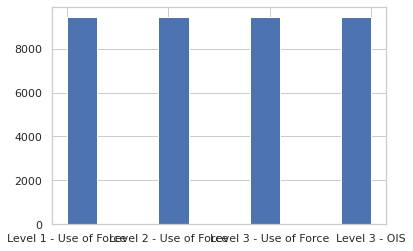

In [378]:
#Oversampling
oversamp = over_sampling.SMOTE()
Xo, yo = oversamp.fit_resample(X, y)
h = plt.hist(yo)

Um problema com a classificação desequilibrada é que há poucos exemplos da classe minoritária para que um modelo aprenda efetivamente o "limite de decisão".

Uma maneira de tentar resolver esse problema é superamostrar os exemplos na classe minoritária. Isso pode ser alcançado simplesmente duplicando exemplos da classe minoritária no conjunto de dados de treinamento antes de ajustar um modelo. Isso pode equilibrar a distribuição de classes, mas não fornece nenhuma informação adicional ao modelo.

Uma melhoria na duplicação de exemplos da classe minoritária é sintetizar novos exemplos da classe minoritária. Este é um tipo de aumento de dados para dados tabulares e pode ser muito eficaz.

Talvez a abordagem mais amplamente usada para sintetizar novos exemplos seja chamada de (Synthetic Minority Over-sampling Technique) SMOTE .

In [379]:
x_train_ov, x_test_ov, y_train_ov, y_test_ov = train_test_split(Xo, yo, test_size = p)

In [380]:
svc_model_ov = SVC(gamma='auto')
svc_model_ov.fit(x_train_ov, y_train_ov)

y_pred_svc_ov = svc_model_ov.predict(x_test_ov)

In [382]:
print('Acurácia - SVM com oversampling: ', metrics.accuracy_score(y_test_ov, y_pred_svc_ov))
print('Acurácia balanceada - SVM com oversampling: ', metrics.balanced_accuracy_score(y_test_ov, y_pred_svc_ov))

Acurácia - SVM com oversampling:  0.6997880233174351
Acurácia balanceada - SVM com oversampling:  0.6983765942706102


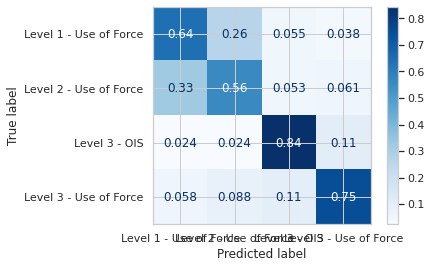

In [383]:
disp = ConfusionMatrixDisplay.from_estimator(svc_model_ov, x_test_ov, y_test_ov,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Embora os dados estejam mais balanceados, a acurácia do modelo não aumentou, porém diminuiu pouca coisa.

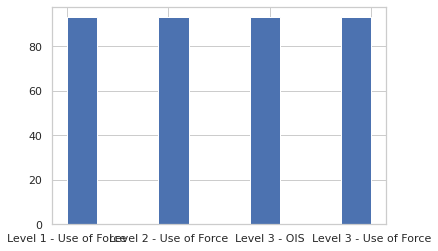

In [384]:
#Undersampling
undersamp = under_sampling.RandomUnderSampler()
Xu, yu = undersamp.fit_resample(X, y)
h = plt.hist(yu)

In [385]:
x_train_ud, x_test_ud, y_train_ud, y_test_ud = train_test_split(Xu, yu, test_size = p)

In [386]:
svc_model_ud = SVC(gamma='auto')
svc_model_ud.fit(x_train_ud, y_train_ud)

y_pred_svc_ud = svc_model_ud.predict(x_test_ud)

In [387]:
print('Acurácia - SVM com undersampling: ', metrics.accuracy_score(y_test_ud, y_pred_svc_ud))
print('Acurácia balanceada - SVM com undersampling: ', metrics.balanced_accuracy_score(y_test_ud, y_pred_svc_ud))

Acurácia - SVM com undersampling:  0.38666666666666666
Acurácia balanceada - SVM com undersampling:  0.40688697267644636


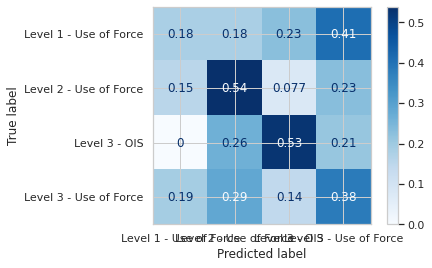

In [388]:
disp = ConfusionMatrixDisplay.from_estimator(svc_model_ud, x_test_ud, y_test_ud,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Algumas explicações para a baixa acurácia são (i) as variáveis explicativas utilizadas não são suficientes para explicar a variabilidade no uso da força policial - nesse caso, seria necessário incluir novas variáveis a partir de bases de dados complementares; (ii) a quantidade de dados disponível não é suficiente para treinar o modelo de classificação, que não captura adequadamente o padrão de variabilidade do nível de uso da força policial.